# Titanic Dataset

>  **Question: What factors made people more likely to survive?**

# Load Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
titanic_raw = pd.read_csv('titanic-data.csv')

In [3]:
titanic_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Feature Engineering

In [5]:
titanic = titanic_raw.copy()

### Add new column including male, female, child info

In [6]:
def male_female_child(passenger):
    age, sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

In [7]:
titanic['Person'] = titanic[['Age','Sex']].apply(male_female_child, axis = 1)

### Add family column

In [8]:
def have_family(passenger):
    SibSp, Parch = passenger
    if SibSp > 0 or Parch > 0:
        return 1
    else:
        return 0

In [9]:
titanic['Have_family'] = titanic[['SibSp','Parch']].apply(have_family,axis = 1)

### Modify cabin column

In [10]:
titanic['Ccabin'] = titanic['Cabin'].str[0]

In [11]:
titanic['Have_cabin'] = 1
titanic.loc[titanic['Ccabin'].isnull(), 'Have_cabin'] = 0

In [12]:
titanic.loc[titanic['Ccabin'].isnull(), 'Ccabin'] = 'None'

### Drop unhelpful columns

In [13]:
titanic.drop(['Cabin','Ticket','Name'], axis = 1, inplace= True)

In [14]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Person,Have_family,Ccabin,Have_cabin
0,1,0,3,male,22.0,1,0,7.2500,S,male,1,None,0
1,2,1,1,female,38.0,1,0,71.2833,C,female,1,C,1
2,3,1,3,female,26.0,0,0,7.9250,S,female,0,None,0
3,4,1,1,female,35.0,1,0,53.1000,S,female,1,C,1
4,5,0,3,male,35.0,0,0,8.0500,S,male,0,None,0


# Basic Viz

## Survival Rate Across Gender (Women and Children First?)

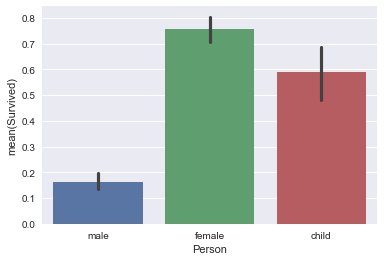

In [15]:
sns.barplot(x = "Person", y = "Survived", data = titanic)

> Women and children have higher survival rates.

## Survival Rate Across Class

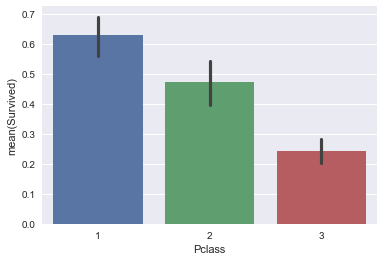

In [16]:
sns.barplot(x = "Pclass", y = "Survived", data = titanic)

> Survival rate for the 3rd class are substantially lower, but maybe this effect is being caused by the large amount of men in the 3rd class in combination with the women and children first policy. Let's consider both class and gender.

### Gender Distribution Across Class

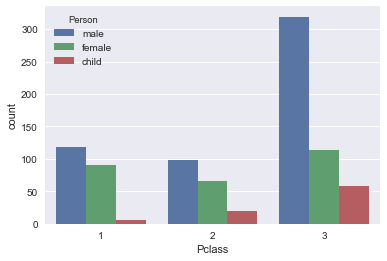

In [17]:
sns.countplot(x = 'Pclass', hue = 'Person', data = titanic)

### Combine Class and Gender

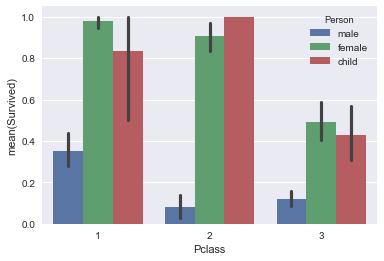

In [18]:
sns.barplot(x = "Pclass", y = "Survived", hue ='Person', data = titanic)

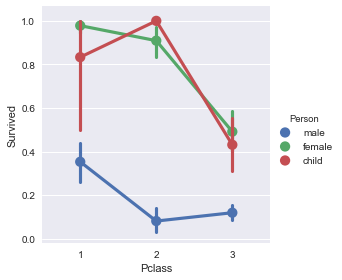

In [19]:
sns.factorplot(x = "Pclass", y = "Survived", hue ='Person', data = titanic)

> It looks like being a male or being in 3rd class are boh not favourable for survival. Even regardless of class the result of being a male in any class dramatically decreases the chances of survival.

## Survival Rate and Fare

(0, 150)

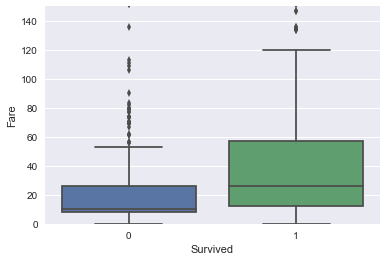

In [20]:
sns.boxplot(x = 'Survived', y = 'Fare', data = titanic)
plt.ylim(0,150)

(0, 150)

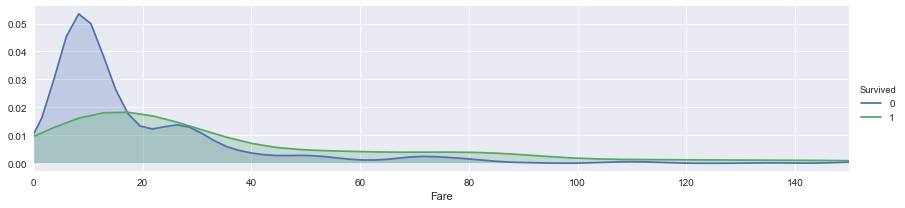

In [21]:
fig = sns.FacetGrid(titanic, hue = 'Survived', aspect = 4)
fig.map(sns.kdeplot, 'Fare', shade = True)
fig.add_legend()
plt.xlim(0,150)

> People who survived pay higher fares.

## Survival Rate and Age

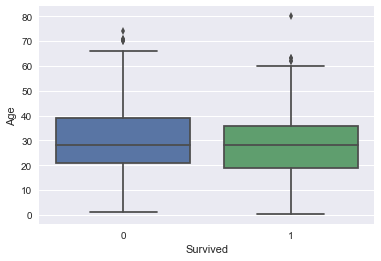

In [22]:
sns.boxplot(x = 'Survived', y = 'Age', data = titanic)

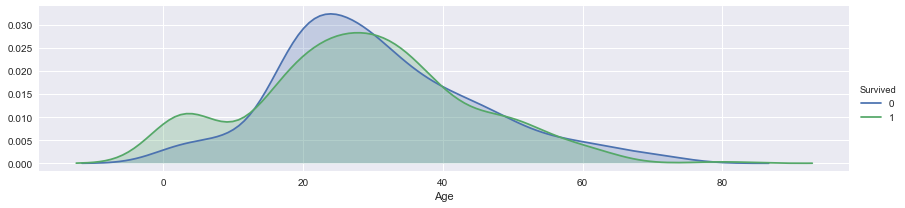

In [23]:
fig = sns.FacetGrid(titanic, hue = 'Survived', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)
fig.add_legend()

> Age has no significant impact on survival rate except that children have higher survival rate because of women and children first policy.

## Survival Rate and Cabin

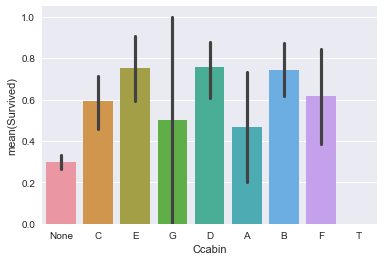

In [24]:
sns.barplot(x = 'Ccabin', y = 'Survived', data = titanic)

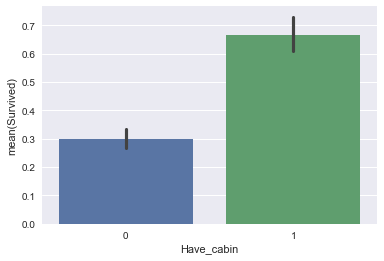

In [25]:
sns.barplot(x = 'Have_cabin', y = 'Survived', data = titanic)

> People who have a cabin have higer survival chances, because they are largely in the first class.

## Survival Rate and Embark

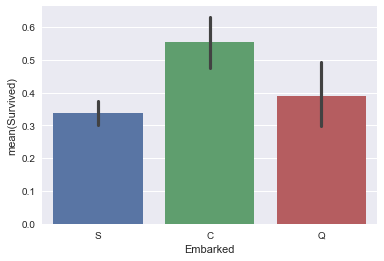

In [26]:
sns.barplot(x = 'Embarked', y = 'Survived', data = titanic)

> Embark does not seem have impact on survival rate.

## Survial Rate and Family

### Survival Rate and Siblings / Spouses member

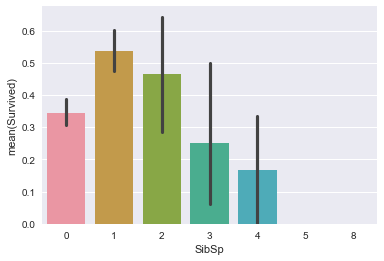

In [27]:
sns.barplot(x = 'SibSp', y = 'Survived', data = titanic)

### Survival Rate and Parents / Children member

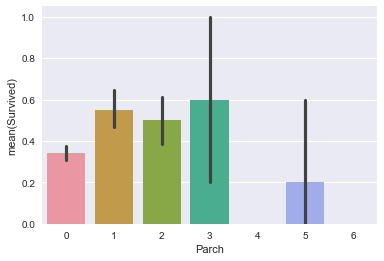

In [28]:
sns.barplot(x = 'Parch', y = 'Survived', data = titanic)

### Survival Rate and Family Member

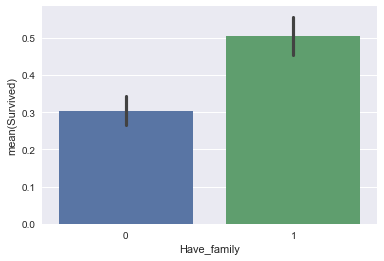

In [29]:
sns.barplot(x = 'Have_family', y = 'Survived', data = titanic)

### Survival Rate and Family Member (Across gender)

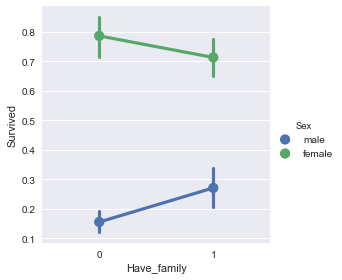

In [30]:
sns.factorplot(x = 'Have_family', y = 'Survived', hue = 'Sex',data = titanic)

> For a male, having female family members may get him into the boat and increase survival chances.

# Using Models to Quantify the Impact

In the next section, I will employ two models to quantify which selected factors made people more likely to survive

## Preprocessing

In [31]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Person,Have_family,Ccabin,Have_cabin
0,1,0,3,male,22.0,1,0,7.2500,S,male,1,None,0
1,2,1,1,female,38.0,1,0,71.2833,C,female,1,C,1
2,3,1,3,female,26.0,0,0,7.9250,S,female,0,None,0
3,4,1,1,female,35.0,1,0,53.1000,S,female,1,C,1
4,5,0,3,male,35.0,0,0,8.0500,S,male,0,None,0


In [32]:
X = titanic.loc[:,['Pclass','Person','Age','Fare','Have_family','Have_cabin']]

In [33]:
X = X.fillna(titanic.median())

In [34]:
X = X.values; X

array([[3, 'male', 22.0, 7.25, 1, 0],
       [1, 'female', 38.0, 71.2833, 1, 1],
       [3, 'female', 26.0, 7.925, 0, 0],
       ..., 
       [3, 'female', 28.0, 23.45, 1, 0],
       [1, 'male', 26.0, 30.0, 0, 1],
       [3, 'male', 32.0, 7.75, 0, 0]], dtype=object)

In [35]:
# child:0. female:1, male:2
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:,0] = labelencoder_X.fit_transform(X[:,0])
X[:,1] = labelencoder_X.fit_transform(X[:,1])
X

array([[2, 2, 22.0, 7.25, 1, 0],
       [0, 1, 38.0, 71.2833, 1, 1],
       [2, 1, 26.0, 7.925, 0, 0],
       ..., 
       [2, 1, 28.0, 23.45, 1, 0],
       [0, 2, 26.0, 30.0, 0, 1],
       [2, 2, 32.0, 7.75, 0, 0]], dtype=object)

In [36]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features = [0,1])

In [37]:
X = onehotencoder.fit_transform(X).toarray(); X

array([[  0.    ,   0.    ,   1.    , ...,   7.25  ,   1.    ,   0.    ],
       [  1.    ,   0.    ,   0.    , ...,  71.2833,   1.    ,   1.    ],
       [  0.    ,   0.    ,   1.    , ...,   7.925 ,   0.    ,   0.    ],
       ..., 
       [  0.    ,   0.    ,   1.    , ...,  23.45  ,   1.    ,   0.    ],
       [  1.    ,   0.    ,   0.    , ...,  30.    ,   0.    ,   1.    ],
       [  0.    ,   0.    ,   1.    , ...,   7.75  ,   0.    ,   0.    ]])

In [38]:
X[0,]

array([  0.  ,   0.  ,   1.  ,   0.  ,   0.  ,   1.  ,  22.  ,   7.25,
         1.  ,   0.  ])

In [39]:
y = titanic['Survived'].values

In [40]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

In [41]:
X[:,6:8] = sc_X.fit_transform(X[:,6:8])

In [42]:
X

array([[ 0.        ,  0.        ,  1.        , ..., -0.50244517,
         1.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.78684529,
         1.        ,  1.        ],
       [ 0.        ,  0.        ,  1.        , ..., -0.48885426,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  1.        , ..., -0.17626324,
         1.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        , ..., -0.04438104,
         0.        ,  1.        ],
       [ 0.        ,  0.        ,  1.        , ..., -0.49237783,
         0.        ,  0.        ]])

In [43]:
feature_names = ['1st_Class','2nd_Class','3rd_Class','Child','Female','Male','Age','Fare','Have_Family','Have_Cabin']
label_names = ['Dead','Survived']

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Logistic Regression

In [46]:
import sklearn
from sklearn.linear_model import LogisticRegression

In [47]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
clf.intercept_

array([ 0.14699318])

In [49]:
clf.coef_

array([[ 0.84711076,  0.12736905, -0.82748663,  0.49507625,  1.21983635,
        -1.56791941, -0.38170758,  0.02795436, -0.50241254,  0.8236103 ]])

In [50]:
zip(feature_names, clf.coef_[0])

[('1st_Class', 0.84711075896421884),
 ('2nd_Class', 0.12736905473417429),
 ('3rd_Class', -0.82748663001357448),
 ('Child', 0.49507624517810311),
 ('Female', 1.2198363485689871),
 ('Male', -1.5679194100622833),
 ('Age', -0.38170757953891871),
 ('Fare', 0.027954361274574076),
 ('Have_Family', -0.50241254081923392),
 ('Have_Cabin', 0.82361030323437734)]

> Being female makes people most likely to survive. Being children or in 1st class or having cabins are strong positively correlated with survival rate as well.

### Decision Tree

In [51]:
from IPython.display import Image 
import pydotplus

In [52]:
def plot_tree(clf, feature_names, target_names):
    dot_data = sklearn.tree.export_graphviz(clf, out_file=None, 
                             feature_names=feature_names,  
                             class_names= target_names,  
                             filled=True, rounded=True,  
                             special_characters=True) 
    return pydotplus.graph_from_dot_data(dot_data).create_png() 

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
clf = DecisionTreeClassifier(max_depth = 3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

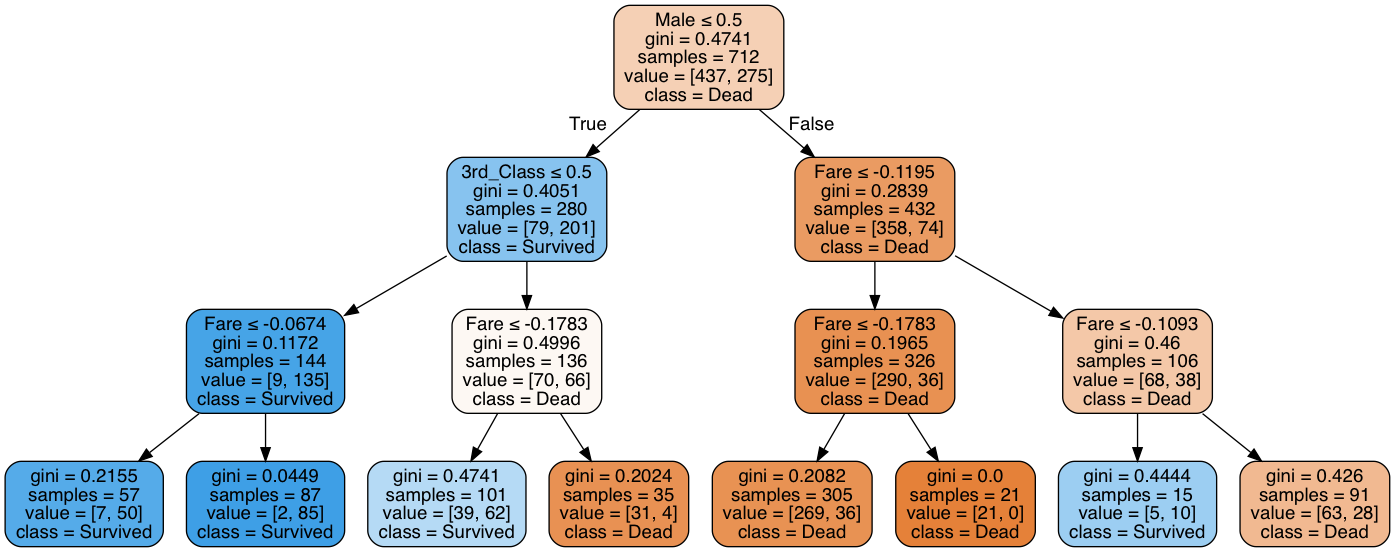

In [55]:
Image(plot_tree(clf, feature_names, label_names))

> Decision Tree also shows that being female and in non third-class makes people most likely to survive.

#### *Conclusion: Female, children, higher class and fare, having cabin are positive indicators for survival. The factor being female makes people most likely to survive.*